<a href="https://colab.research.google.com/github/Harsha-2005/Elevate-Labs-AI-and-ML-Internship/blob/main/Elevate_Labs_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("Titanic-Dataset.csv")
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

Histograms figure saved as 'titanic_numeric_histograms.png'
Boxplots figure saved as 'titanic_numeric_boxplots.png'


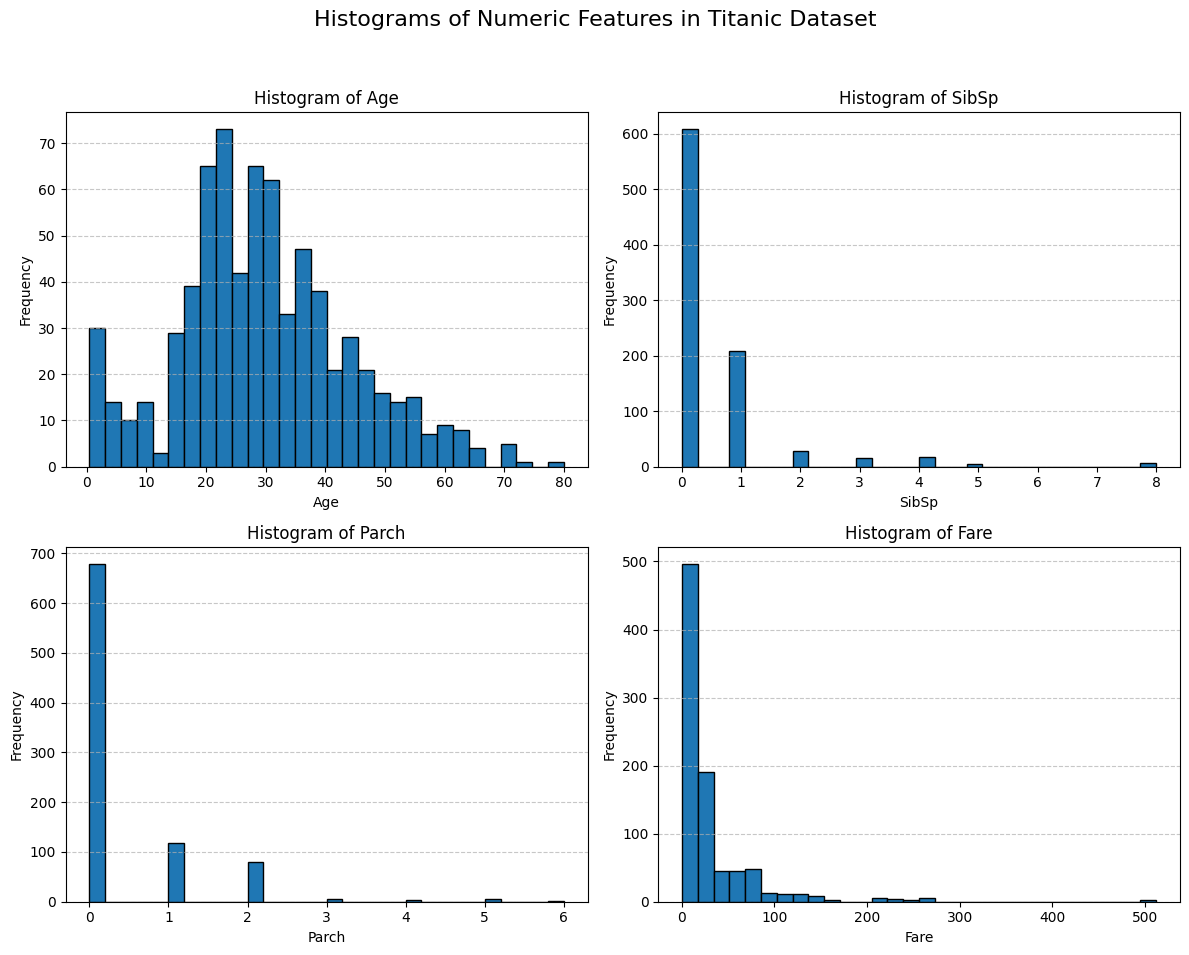

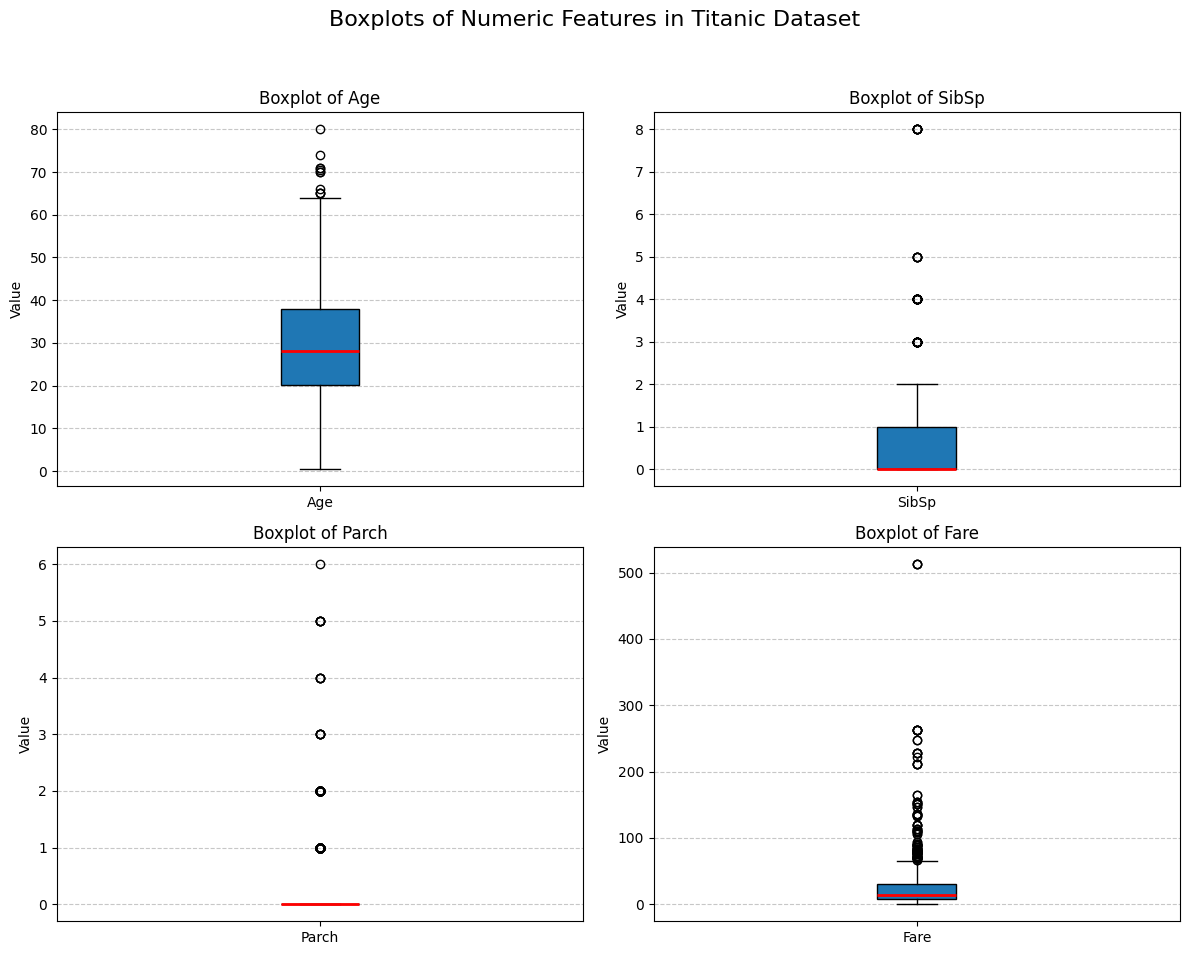

In [8]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# --- Create Histograms ---

# Create a 2x2 grid for histograms
fig_hist, axes_hist = plt.subplots(2, 2, figsize=(12, 10))
# Flatten the axes array for easy iteration
axes_hist = axes_hist.flatten()
for i, feature in enumerate(numeric_features):
    # Drop missing values for plotting (especially relevant for 'Age')
    data_to_plot = df[feature].dropna()

        # Plot histogram
    axes_hist[i].hist(data_to_plot, bins=30, edgecolor='black')
    axes_hist[i].set_title(f'Histogram of {feature}', fontsize=12)
    axes_hist[i].set_xlabel(feature, fontsize=10)
    axes_hist[i].set_ylabel('Frequency', fontsize=10)
    axes_hist[i].grid(axis='y', linestyle='--', alpha=0.7)
# Add a main title for the histograms

fig_hist.suptitle('Histograms of Numeric Features in Titanic Dataset', fontsize=16)
# Adjust layout to prevent overlap
fig_hist.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the histograms figure
plt.savefig('titanic_numeric_histograms.png')
print("Histograms figure saved as 'titanic_numeric_histograms.png'")


# --- Create Boxplots ---

# Create a 2x2 grid for boxplots
fig_box, axes_box = plt.subplots(2, 2, figsize=(12, 10))
# Flatten the axes array
axes_box = axes_box.flatten()

for i, feature in enumerate(numeric_features):
    # Drop missing values for plotting
    data_to_plot = df[feature].dropna()

    # Plot boxplot
    axes_box[i].boxplot(data_to_plot, vert=True, patch_artist=True, medianprops={'color':'red', 'linewidth':2})
    axes_box[i].set_title(f'Boxplot of {feature}', fontsize=12)
    axes_box[i].set_ylabel('Value', fontsize=10)
    axes_box[i].set_xticklabels([feature])
    # Set x-tick label
    axes_box[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a main title for the boxplots
fig_box.suptitle('Boxplots of Numeric Features in Titanic Dataset', fontsize=16)
# Adjust layout
fig_box.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save the boxplots figure
plt.savefig('titanic_numeric_boxplots.png')
print("Boxplots figure saved as 'titanic_numeric_boxplots.png'")

Generating correlation matrix heatmap...
Correlation heatmap saved as 'titanic_correlation_heatmap.png'

Generating pairplot...
Pairplot saved as 'titanic_pairplot.png'


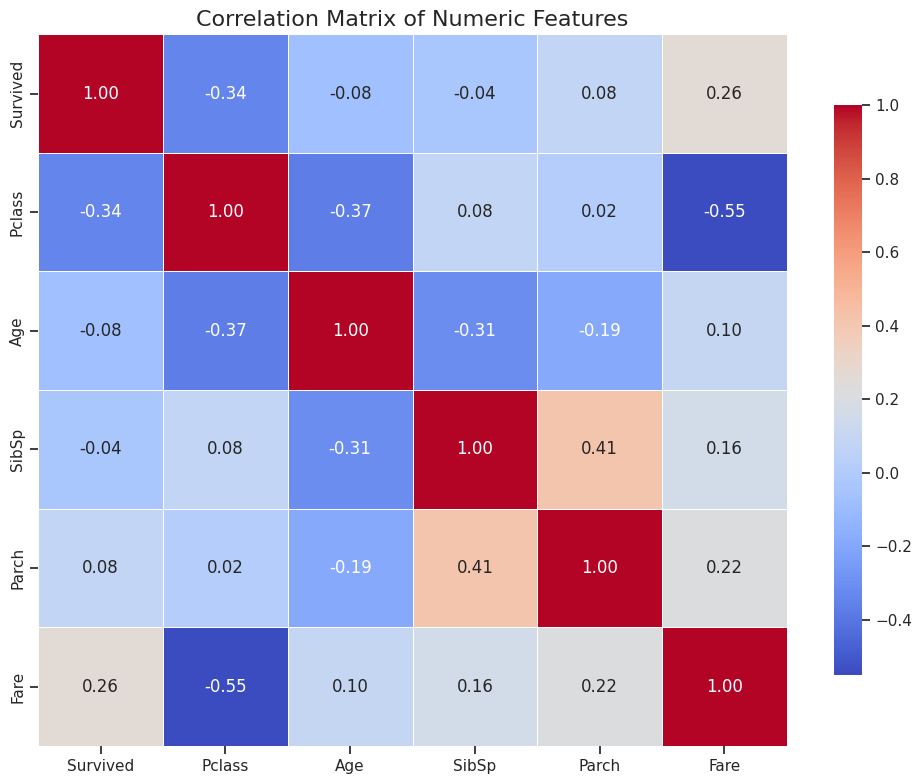

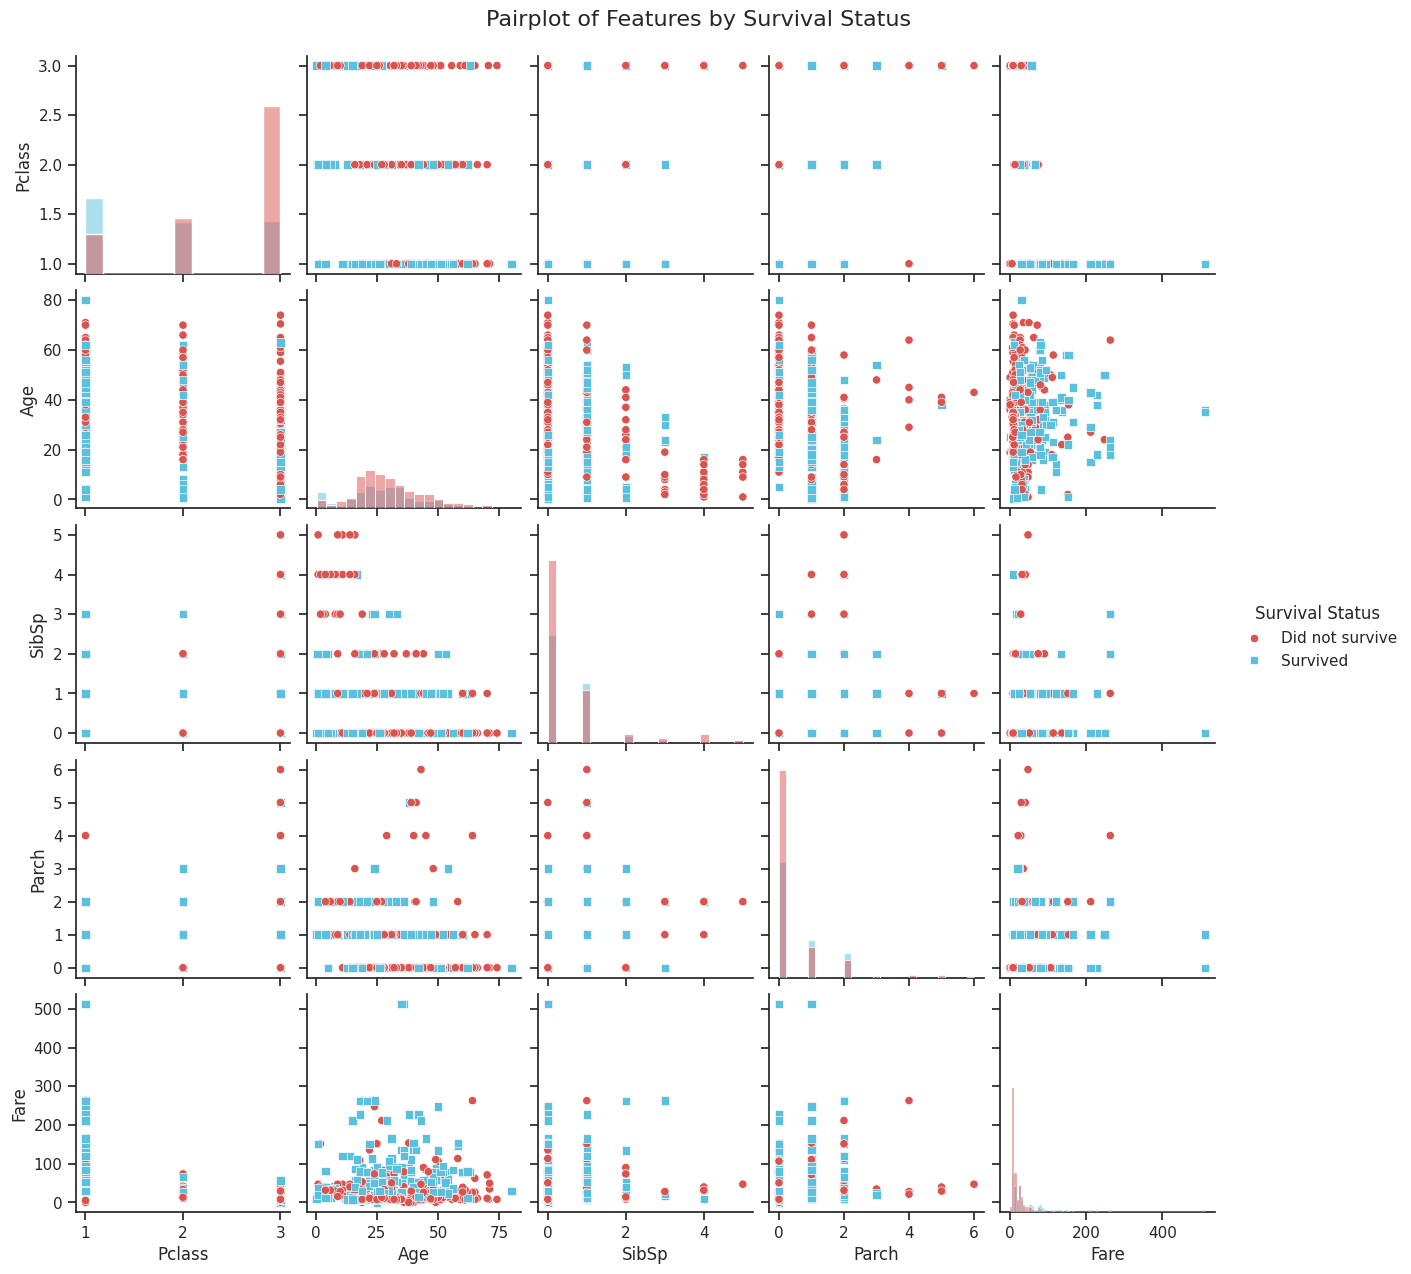

In [14]:
print("Generating correlation matrix heatmap...")
sns.set(style="ticks")
numeric_features_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix=df[numeric_features_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=.5,cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout() # Adjust layout to prevent label overlap

# Save the figure
plt.savefig('titanic_correlation_heatmap.png')
print("Correlation heatmap saved as 'titanic_correlation_heatmap.png'")

print("\nGenerating pairplot...")

pairplot_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
# Drop rows where any of these specific columns are NaN (mostly 'Age')
df_pairplot = df[pairplot_features].dropna()

# Create a new column with string labels for the legend
df_pairplot['Survival Status'] = df_pairplot['Survived'].map({0: 'Did not survive', 1: 'Survived'})

# --- FIX WAS HERE ---
# The palette keys must match the values in the 'hue' column ('Survival Status')
palette_map = {'Did not survive': '#D9534F', 'Survived': '#5BC0DE'} # Red-ish and Blue-ish colors

# Create the pairplot
pairplot_fig = sns.pairplot(df_pairplot, vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],hue='Survival Status', palette=palette_map,diag_kind='hist', markers=["o", "s"])

# Add a main title
pairplot_fig.fig.suptitle('Pairplot of Features by Survival Status', y=1.02, fontsize=16)

# Save the figure
pairplot_fig.savefig('titanic_pairplot.png')
print("Pairplot saved as 'titanic_pairplot.png'")

Generating plots for categorical feature patterns...


/tmp/ipython-input-390292564.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ax=axes1[0, 0], palette='pastel')
/tmp/ipython-input-390292564.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ax=axes1[0, 1], palette='pastel')
/tmp/ipython-input-390292564.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ax=axes1[1, 0], palette='pastel')
/tmp/ipython-input-390292564.py:39: FutureWarning: 

Passing `palette` without assigning `hue` 

Categorical patterns plot saved as 'titanic_categorical_patterns.png'

Generating plots for numeric feature patterns and anomalies...
Could not set log scale for Fare.


/tmp/ipython-input-390292564.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survival Status', y='Age', data=df.dropna(subset=['Age']),
/tmp/ipython-input-390292564.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survival Status', y='Fare', data=df,


Numeric patterns plot saved as 'titanic_numeric_patterns.png'


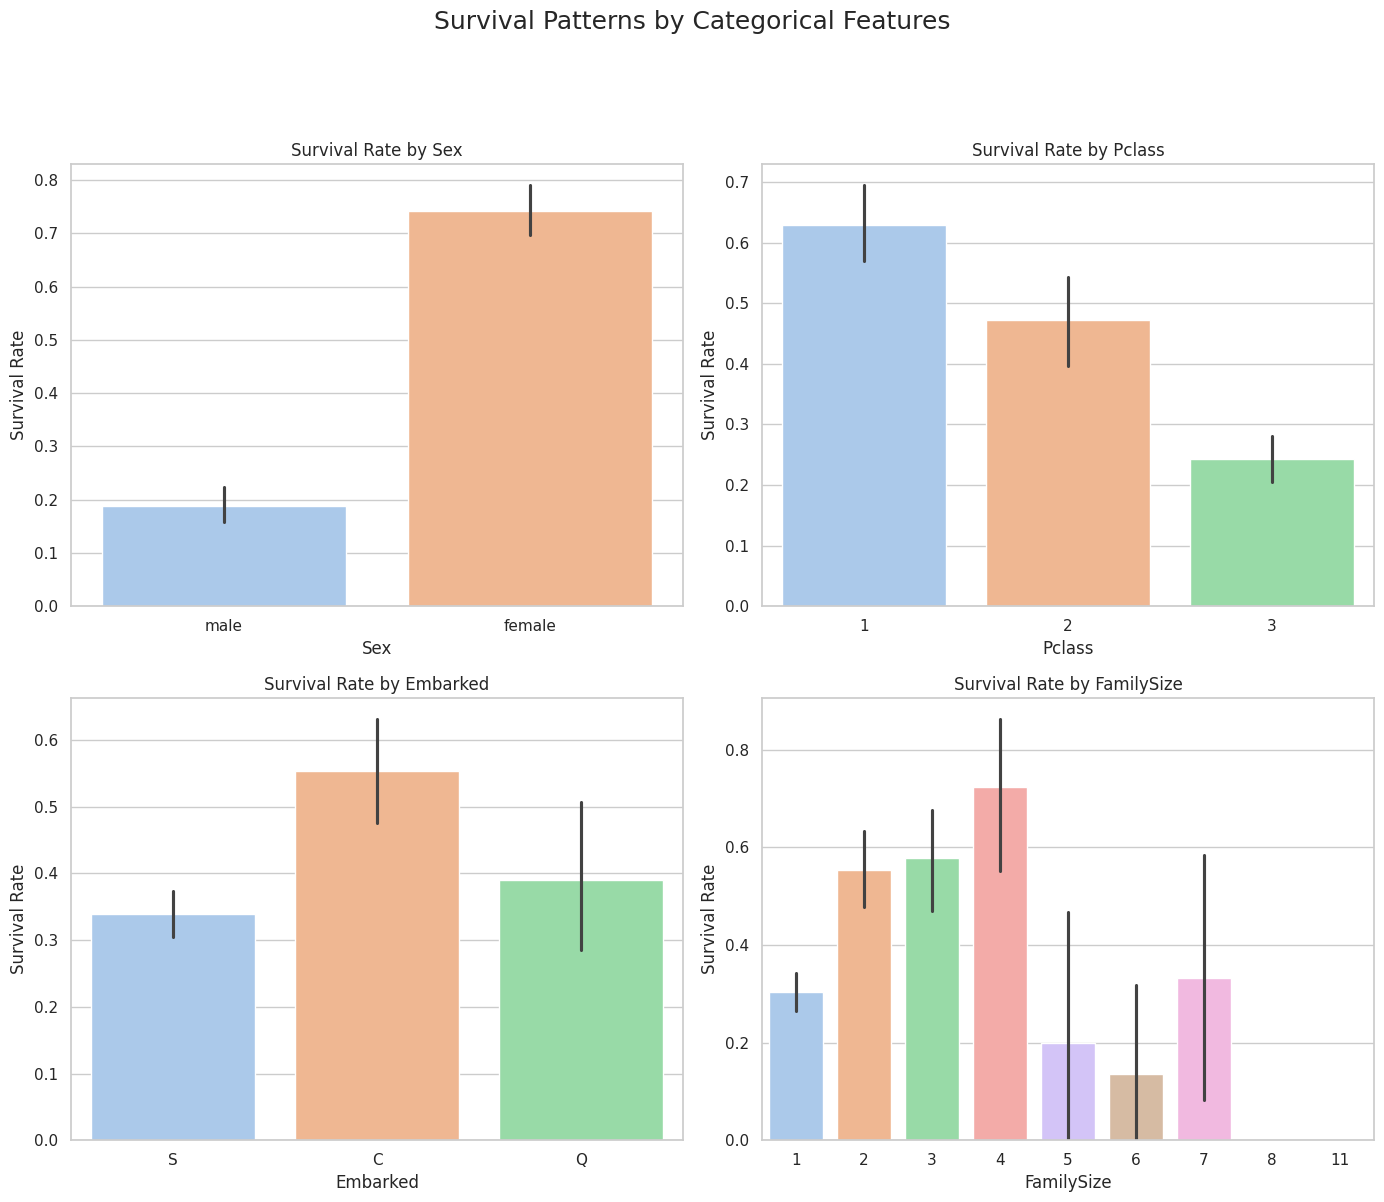

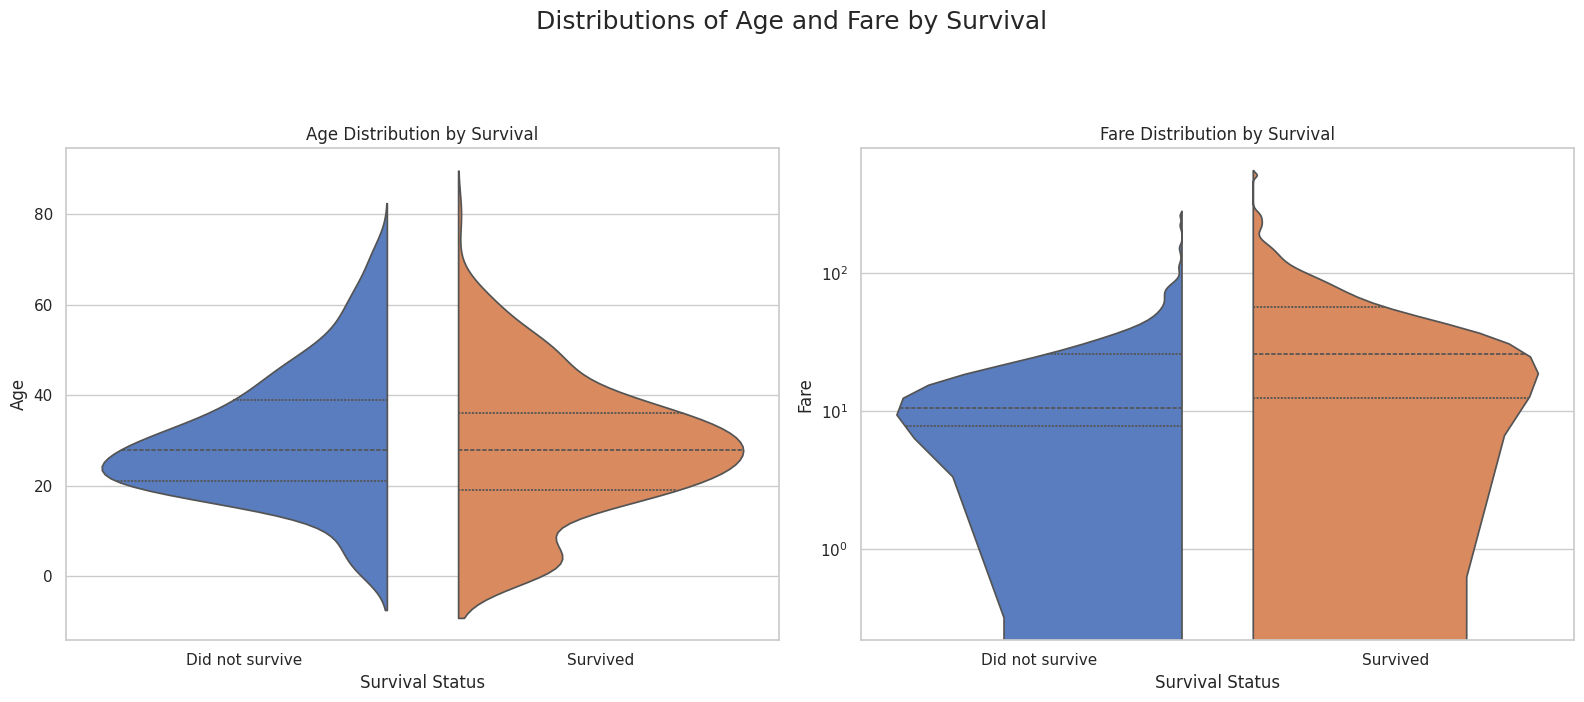

In [17]:
sns.set(style="whitegrid")




    # --- Feature Engineering ---
    # Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Fill missing 'Embarked' data with the mode (most common port) for plotting
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Map 'Survived' to string labels for clearer plot legends
df['Survival Status'] = df['Survived'].map({0: 'Did not survive', 1: 'Survived'})

    # --- 1. Patterns in Categorical Features (Sex, Pclass, Embarked, FamilySize) ---
print("Generating plots for categorical feature patterns...")

    # Create a 2x2 grid for plots
fig1, axes1 = plt.subplots(2, 2, figsize=(14, 12))
fig1.suptitle('Survival Patterns by Categorical Features', fontsize=18, y=1.03)

    # Plot 1: Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=df, ax=axes1[0, 0], palette='pastel')
axes1[0, 0].set_title('Survival Rate by Sex')
axes1[0, 0].set_ylabel('Survival Rate')

    # Plot 2: Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes1[0, 1], palette='pastel')
axes1[0, 1].set_title('Survival Rate by Pclass')
axes1[0, 1].set_ylabel('Survival Rate')

    # Plot 3: Survival Rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes1[1, 0], palette='pastel')
axes1[1, 0].set_title('Survival Rate by Embarked')
axes1[1, 0].set_ylabel('Survival Rate')

    # Plot 4: Survival Rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes1[1, 1], palette='pastel')
axes1[1, 1].set_title('Survival Rate by FamilySize')
axes1[1, 1].set_ylabel('Survival Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('titanic_categorical_patterns.png')
print("Categorical patterns plot saved as 'titanic_categorical_patterns.png'")

    # --- 2. Patterns & Anomalies in Numeric Features (Age, Fare) ---
print("\nGenerating plots for numeric feature patterns and anomalies...")

    # Create a 1x2 grid for plots
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 7))
fig2.suptitle('Distributions of Age and Fare by Survival', fontsize=18, y=1.03)

    # Plot 1: Age Distribution by Survival
    # Use Violin plot to see distribution shape and potential anomalies
sns.violinplot(x='Survival Status', y='Age', data=df.dropna(subset=['Age']),
                   ax=axes2[0], palette='muted', split=True, inner='quartile')
axes2[0].set_title('Age Distribution by Survival')

    # Plot 2: Fare Distribution by Survival
    # Use Violin plot again. Fare is heavily skewed, so it's good for seeing anomalies.
sns.violinplot(x='Survival Status', y='Fare', data=df,
                   ax=axes2[1], palette='muted', split=True, inner='quartile')
axes2[1].set_title('Fare Distribution by Survival')

    # Set y-axis to log scale for Fare to better visualize the distribution
    # This helps manage the extreme outliers (anomalies)

axes2[1].set_yscale('log')
axes2[1].set_ylabel('Fare (Log Scale)')

        # Handle cases where log scale might fail (e.g., if all fares are zero, though not the case here)
print("Could not set log scale for Fare.")
axes2[1].set_ylabel('Fare')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('titanic_numeric_patterns.png')
print("Numeric patterns plot saved as 'titanic_numeric_patterns.png'")


Certainly. This step is all about interpretation, so no new code is required.

Based on the plots you generated in the previous steps (`titanic_categorical_patterns.png`, `titanic_numeric_patterns.png`, and `titanic_correlation_heatmap.png`), here are the basic feature-level inferences we can make.

### Inferences from Categorical Patterns

* **Sex:** This is one of the strongest patterns. The bar plot for `Sex` clearly shows that **females had a much higher survival rate** (around 74%) than males (around 19%). This strongly supports the "women and children first" maritime protocol.

* **Pclass (Passenger Class):** There is a clear socio-economic pattern. The bar plot for `Pclass` shows a strong negative correlation between class and survival.
    * **1st Class** passengers had the highest survival rate (over 60%).
    * **2nd Class** passengers had a moderate rate (around 47%).
    * **3rd Class** passengers had the lowest rate (under 25%).
    This suggests that wealth and status were major factors in survival.

* **FamilySize:** The bar plot for `FamilySize` (which we created from `SibSp` and `Parch`) reveals a non-linear pattern:
    * **Individuals traveling alone** (`FamilySize` = 1) had a low survival rate (around 30%).
    * **Small families** (`FamilySize` = 2, 3, or 4) had the *highest* survival rates (above 50%).
    * **Large families** (`FamilySize` > 4) had a very poor survival rate. This may be because it was difficult to keep large groups together during the evacuation.

* **Embarked (Port):** The port of embarkation shows a pattern, with passengers from **Cherbourg ('C') having a noticeably higher survival rate** than those from Southampton ('S') or Queenstown ('Q'). This is likely a *confounding variable*; the correlation heatmap might show that 'C' passengers were also more likely to be in 1st Class.

### Inferences from Numeric Patterns & Anomalies

* **Age:** The violin plot for `Age` shows a key trend:
    * **Children (approx. age 0-10) had a significantly higher survival rate** than other age groups. You can see a clear "bump" in the "Survived" distribution for young ages.
    * The largest group of "Did not survive" passengers were **young adults (approx. 20-35 years old)**. This aligns with the "Sex" inference, as this group contained many 3rd-class males.

* **Fare:** The violin plot for `Fare` (especially on a log scale) reinforces the `Pclass` inference.
    * The distribution for "Survived" is visibly shifted towards **higher fares**.
    * The distribution for "Did not survive" is heavily concentrated at the **very bottom of the fare scale**.

* **Anomalies (Fare):** The `Fare` plot (and the original boxplot) shows extreme outliers. Passengers who paid exceptionally high fares (e.g., over $200 or $500) are visible. The violin plot suggests that these high-paying passengers were almost exclusively in the "Survived" group, representing a strong (though small) cluster of wealthy survivors.

### Inferences from Correlation Matrix

* **`Pclass` and `Fare`** have a strong negative correlation (around -0.55). This numerically confirms our inference: 1st class (a low number) is linked to high fares, and 3rd class (a high number) is linked to low fares.
* **`Survived` and `Pclass`** show a negative correlation (-0.34). This confirms the visual inference: as class *number* goes up (from 1st to 3rd), survival *rate* goes down.
* **`Survived` and `Fare`** show a positive correlation (0.26). This confirms that passengers who paid more had a higher chance of survival.